In [77]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import matplotlib.pyplot as plt
import phik
from IPython.display import Markdown as md

In [78]:
df = pd.read_pickle("shared/Motor_Vehicle_Collisions_-_Crashes.pkl")
df

,CRASH DATE_CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,NUMBER OF PERSONS INJURED,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,2021-09-11 02:39:00,NaN,NaN,NaN,NaN,NaN,WHITESTONE EXPRESSWAY,20 AVENUE,NaN,2.0,...,Unspecified,NaN,NaN,NaN,4455765,Sedan,Sedan,NaN,NaN,NaN
1,2022-03-26 11:45:00,NaN,NaN,NaN,NaN,NaN,QUEENSBORO BRIDGE UPPER,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,4513547,Sedan,NaN,NaN,NaN,NaN
2,2022-06-29 06:55:00,NaN,NaN,NaN,NaN,NaN,THROGS NECK BRIDGE,NaN,NaN,0.0,...,Unspecified,NaN,NaN,NaN,4541903,Sedan,Pick-up Truck,NaN,NaN,NaN
3,2021-09-11 09:35:00,BROOKLYN,11208.0,40.667202,-73.866500,"(40.667202, -73.8665)",NaN,NaN,1211 LORING AVENUE,0.0,...,NaN,NaN,NaN,NaN,4456314,Sedan,NaN,NaN,NaN,NaN
4,2021-12-14 08:13:00,BROOKLYN,11233.0,40.683304,-73.917274,"(40.683304, -73.917274)",SARATOGA AVENUE,DECATUR STREET,NaN,0.0,...,NaN,NaN,NaN,NaN,4486609,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018240,2023-07-03 18:05:00,NaN,NaN,40.866806,-73.931010,"(40.866806, -73.93101)",RIVERSIDE DRIVE,NaN,NaN,0.0,...,Unspecified,NaN,NaN,NaN,4648110,Sedan,Sedan,NaN,NaN,NaN
2018241,2023-07-22 21:39:00,BRONX,10457.0,40.844177,-73.902920,"(40.844177, -73.90292)",EAST 174 STREET,WEBSTER AVENUE,NaN,1.0,...,NaN,NaN,NaN,NaN,4648117,Sedan,NaN,NaN,NaN,NaN
2018242,2023-07-02 17:55:00,MANHATTAN,10006.0,40.711033,-74.014540,"(40.711033, -74.01454)",WEST STREET,LIBERTY STREET,NaN,0.0,...,NaN,NaN,NaN,NaN,4648366,Taxi,NaN,NaN,NaN,NaN
2018243,2023-07-22 13:15:00,QUEENS,11433.0,40.691580,-73.793190,"(40.69158, -73.79319)",110 AVENUE,157 STREET,NaN,1.0,...,Driver Inattention/Distraction,NaN,NaN,NaN,4648129,Station Wagon/Sport Utility Vehicle,E-Bike,NaN,NaN,NaN


In [79]:
df.info()
fatalities = (df['NUMBER OF PERSONS KILLED'] > 0).sum()
lead_crash_cause_count = df['CONTRIBUTING FACTOR VEHICLE 1'].value_counts()
value_crash_counts = df[df['CONTRIBUTING FACTOR VEHICLE 1'] != 'Unspecified']['CONTRIBUTING FACTOR VEHICLE 1'].value_counts()
combined_series = df['VEHICLE TYPE CODE 1'].astype(str) + ' & ' + df['VEHICLE TYPE CODE 2'].astype(str)
combination_counts = combined_series.value_counts() 

max_occurrence = combination_counts.max() 
most_common_combinations = combination_counts[combination_counts == max_occurrence]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2018245 entries, 0 to 2018244
Data columns (total 28 columns):
 #   Column                         Dtype         
---  ------                         -----         
 0   CRASH DATE_CRASH TIME          datetime64[ns]
 1   BOROUGH                        object        
 2   ZIP CODE                       object        
 3   LATITUDE                       float64       
 4   LONGITUDE                      float64       
 5   LOCATION                       object        
 6   ON STREET NAME                 object        
 7   CROSS STREET NAME              object        
 8   OFF STREET NAME                object        
 9   NUMBER OF PERSONS INJURED      float64       
 10  NUMBER OF PERSONS KILLED       float64       
 11  NUMBER OF PEDESTRIANS INJURED  int64         
 12  NUMBER OF PEDESTRIANS KILLED   int64         
 13  NUMBER OF CYCLIST INJURED      int64         
 14  NUMBER OF CYCLIST KILLED       int64         
 15  NUMBER OF MOTOR

In [80]:
print('\033[1m**************DETAILS OF INJURIES***************\033[0m')
columns_to_describe = ['NUMBER OF PERSONS INJURED', 'NUMBER OF PEDESTRIANS INJURED', 'NUMBER OF CYCLIST INJURED','NUMBER OF MOTORIST INJURED']
df[columns_to_describe].describe()

**************DETAILS OF INJURIES***************


,NUMBER OF PERSONS INJURED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF CYCLIST INJURED,NUMBER OF MOTORIST INJURED
count,2.018227e+06,2.018245e+06,2.018245e+06,2.018245e+06
mean,3.024249e-01,5.518507e-02,2.612468e-02,2.179889e-01
std,6.937633e-01,2.412867e-01,1.614267e-01,6.549700e-01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,4.300000e+01,2.700000e+01,4.000000e+00,4.300000e+01


In [81]:
print('\033[1m**************DETAILS OF DEATH***************\033[0m')
columns_to_describe = ['NUMBER OF PERSONS KILLED', 'NUMBER OF PEDESTRIANS KILLED', 'NUMBER OF CYCLIST KILLED','NUMBER OF MOTORIST KILLED']
df[columns_to_describe].describe()

**************DETAILS OF DEATH***************


,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST KILLED
count,2.018214e+06,2.018245e+06,2.018245e+06,2.018245e+06
mean,1.446328e-03,7.253827e-04,1.119785e-04,5.896212e-04
std,4.007201e-02,2.741556e-02,1.062812e-02,2.648117e-02
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,8.000000e+00,6.000000e+00,2.000000e+00,5.000000e+00


The maximum number of crashes reported since 2012 in the selected boroughs is: 441026


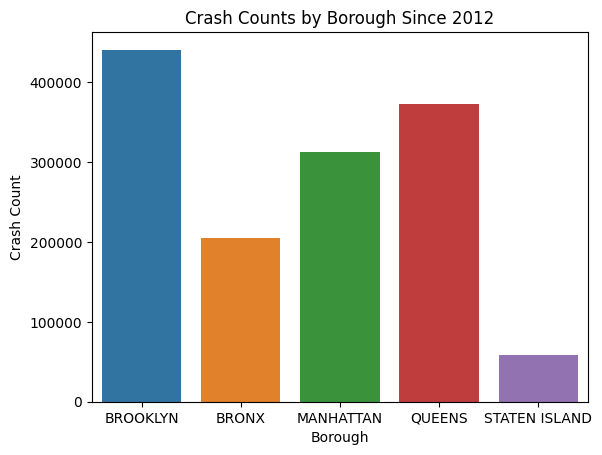

BOROUGH
BROOKLYN         441026
QUEENS           372457
MANHATTAN        313266
BRONX            205345
STATEN ISLAND     58297
Name: count, dtype: int64


In [82]:
## Borough with the maximum number of crashes reported since 2012
df = df[df['CRASH DATE_CRASH TIME'].dt.year >= 2012]
boroughs = ['MANHATTAN','BROOKLYN','BRONX','QUEENS','STATEN ISLAND']
df = df[df['BOROUGH'].isin(boroughs)]
max_crash_count = df['BOROUGH'].value_counts().max()

print(f"The maximum number of crashes reported since 2012 in the selected boroughs is: {max_crash_count}")
sns.countplot(x='BOROUGH', data=df)
plt.title('Crash Counts by Borough Since 2012')
plt.xlabel('Borough')
plt.ylabel('Crash Count')
plt.show()

value_counts = df['BOROUGH'].value_counts()
print(value_counts)

In [64]:
## Borough with the maximum number of crashes adjusted for population

MANHATTAN = "MANHATTAN"
man_crash = df[df['BOROUGH'] == MANHATTAN]['BOROUGH'].count()
man_crash = (man_crash/1638281)*100000

BROOKLYN = "BROOKLYN"
brook_crash = df[df['BOROUGH'] == BROOKLYN]['BOROUGH'].count()
brook_crash = (brook_crash/1638281)*100000

QUEENS = "QUEENS"
queens_crash = df[df['BOROUGH'] == QUEENS]['BOROUGH'].count()
queens_crash = (queens_crash/1638281)*100000

BRONX = "BRONX"
bronx_crash = df[df['BOROUGH'] == BRONX]['BOROUGH'].count()
bronk_crash = (man_crash/1638281)*100000

STATEN_ISLAND = "STATEN ISLAND"
staten_island_crash = df[df['BOROUGH'] == STATEN_ISLAND]['BOROUGH'].count()
staten_island_crash = (staten_island_crash/1638281)*100000

print('**********Boroughs with maximum number of crashes per population***************')
print(f'Manhattan: {man_crash}')
print(f'Brooklyn: {brook_crash}')
print(f'Queens: {queens_crash}')
print(f'Bronx: {bronx_crash}')
print(f'Staten Island: {staten_island_crash}')


**********Boroughs with maximum number of crashes per population***************
Manhattan: 19121.628096767283
Brooklyn: 26920.04607268228
Queens: 22734.62244877405
Bronx: 205345
Staten Island: 3558.4249588440566


In [65]:
## Analyzing the leading cause of crashes
print(lead_crash_cause_count)

CONTRIBUTING FACTOR VEHICLE 1
Unspecified                       692736
Driver Inattention/Distraction    401262
Failure to Yield Right-of-Way     119166
Following Too Closely             107467
Backing Unsafely                   75042
                                   ...  
Cell Phone (hand-held)                79
Windshield Inadequate                 77
Texting                               50
Listening/Using Headphones            24
1                                     10
Name: count, Length: 61, dtype: int64


In [66]:
## Top 3 causes of crashes
top_3_values = value_crash_counts.head(3)
print(top_3_values)

CONTRIBUTING FACTOR VEHICLE 1
Driver Inattention/Distraction    401262
Failure to Yield Right-of-Way     119166
Following Too Closely             107467
Name: count, dtype: int64


In [67]:
## Analyzing fatalities
print(fatalities)

2804


In [73]:
## Likelihood of fatal accidents
#### On average, out of every 1000 accidents, how many have resulted in at least one person dead?
print(fatalities)
per1000_count = (fatalities / 2018244) *1000
print(per1000_count)

2804
1.3893265630914795


In [74]:
## Missing data
column_borough = "BOROUGH"
nan_count = df[column_borough].isna().sum()
print(nan_count)
#### What proportion of accidents in the data do not have a Borough code?

0


In [76]:
## Which combinations of vehicles have the most number of accidents 

print("Combination(s) of 'VEHICLE TYPE CODE 1' and 'VEHICLE TYPE CODE 2' with the highest occurrence:") 
                      
for combination, count in most_common_combinations.items( ):
                      print(f"Combination: {combination}, Count: {count}")

Combination(s) of 'VEHICLE TYPE CODE 1' and 'VEHICLE TYPE CODE 2' with the highest occurrence:
Combination: PASSENGER VEHICLE & PASSENGER VEHICLE, Count: 139729
